<a href="https://colab.research.google.com/github/jdsmithwes/Telco-Data-Churn/blob/master/Module3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Churn Project
Jamaal Smith



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

# Data Import and Cleaning

## First Impressions of Data

In [146]:
#import the data
df = pd.read_csv('churn_data.csv')

#characteristics of the data
from scrubbing import info
info(df)

(state                      object
 account length              int64
 area code                   int64
 phone number               object
 international plan         object
 voice mail plan            object
 number vmail messages       int64
 total day minutes         float64
 total day calls             int64
 total day charge          float64
 total eve minutes         float64
 total eve calls             int64
 total eve charge          float64
 total night minutes       float64
 total night calls           int64
 total night charge        float64
 total intl minutes        float64
 total intl calls            int64
 total intl charge         float64
 customer service calls      int64
 churn                        bool
 dtype: object,
 (3333, 21),
   state  account length  ...  customer service calls  churn
 0    KS             128  ...                       1  False
 1    OH             107  ...                       1  False
 2    NJ             137  ...                       0

Based on initial review of the data, we can conclude that the dataset is comprised of 21 columns and 3333 rows. Further, there are no null values in the data set.

The next step in preparing the data for the model is to convert the object type in the phone number, international plan, and voicemail plan columns for the machine learning model.

For now, I will only focus on the international and voicemail plan columns. I made this decision because the phone number a person is assigned plays no role in whether or not a person keeps their service.

In [147]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Voicemail and International Plan treatment

In these two columns, the number 1 signifies yes and 0 signifies no

In [148]:
key = {'yes':1, 'no':0}
df['international plan']=df['international plan'].map(key)
df['voice mail plan'] = df['voice mail plan'].map(key)

df['international plan'].astype(str).astype(float)
df['voice mail plan'].astype(str).astype(float)

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
3328    1.0
3329    0.0
3330    0.0
3331    0.0
3332    1.0
Name: voice mail plan, Length: 3333, dtype: float64

As noted before, since it is hard to argue that a given phone number has any relation to churn rate, this column will be eliminated now as part of the feature selection process.

In [0]:
df_final = df.drop('phone number', axis = 1)

## Treatment of State Column

In [150]:
#display(df_final['state'].value_counts())
df_final = df_final.drop('state',axis=1)
df_final.shape

(3333, 19)

At first, I didn't think that state would have any predictive value in the model. However, by using groupby, I was able to organize the dataset by the mean of all explanatory variables for a particular state. This can also ease future calculations because instead of 3000+ rows, the models will only have 51.

This thought was later reversed when treating for outliers. To prevent overfit of the model and knowing that the state isn't an important feature as measured by the chi-squared score later, we will drop the state column

## Assigning Data and Target Variables

## Data Distribution Visualization

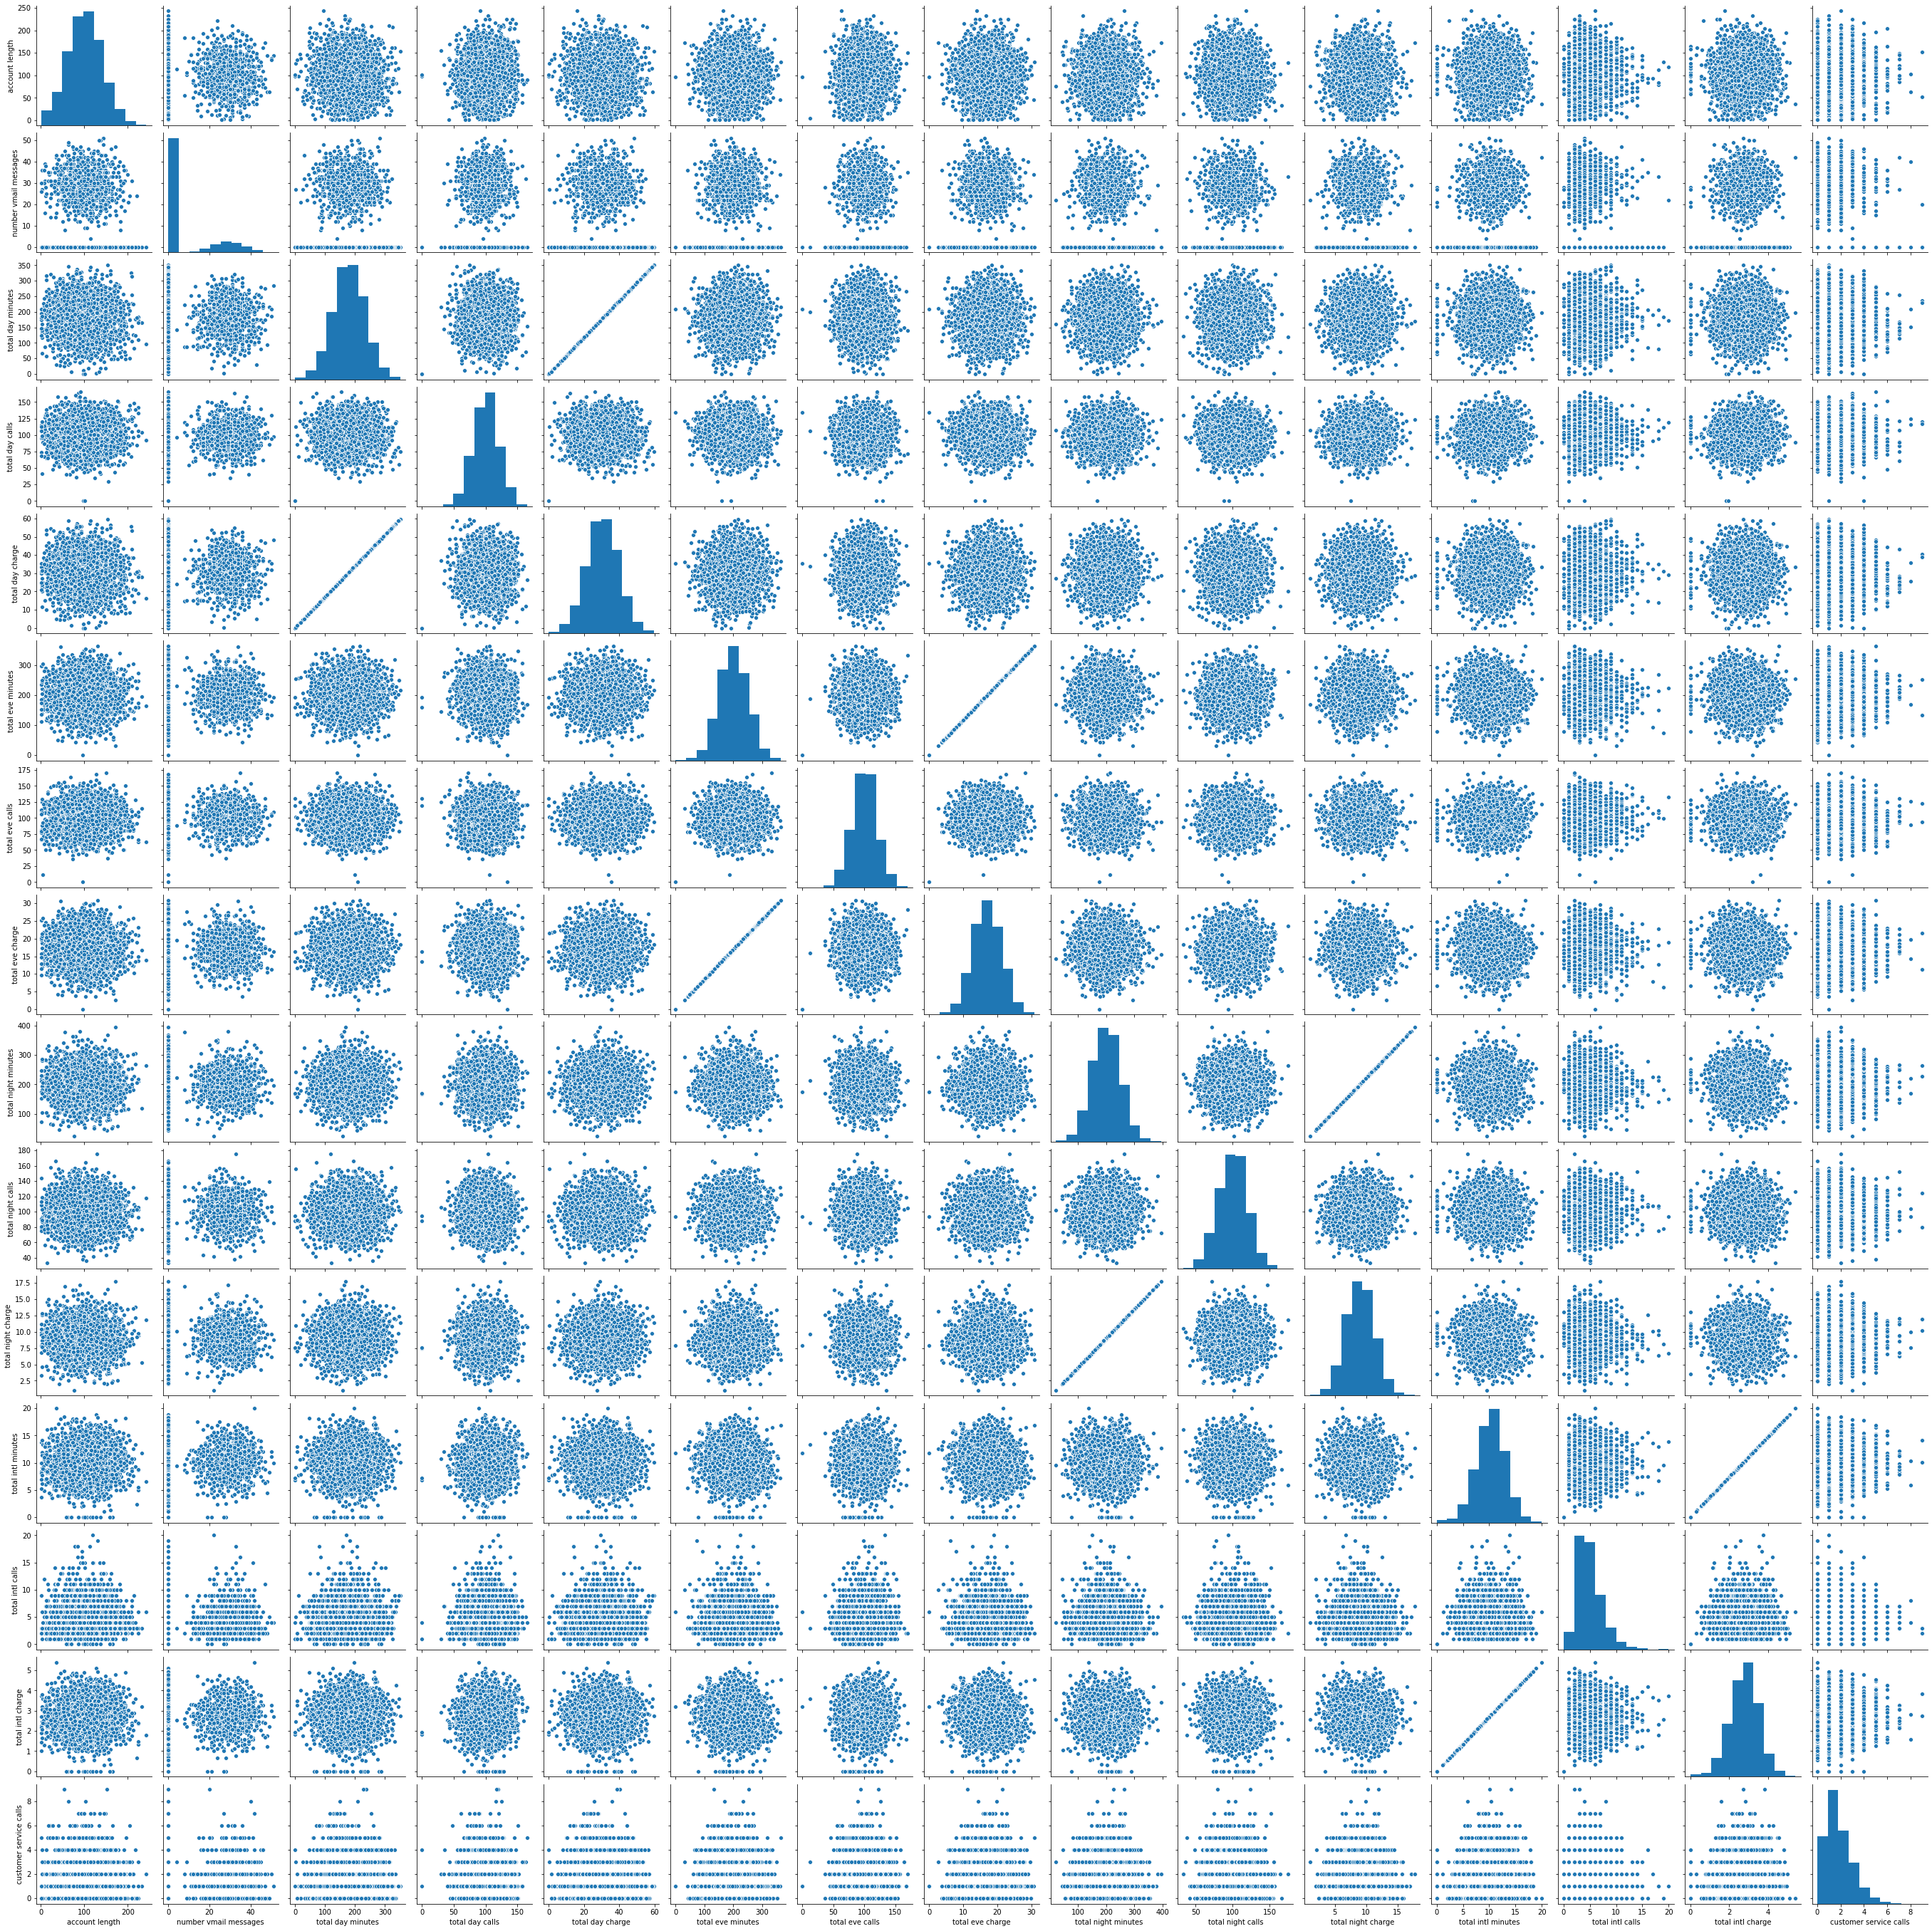

In [151]:
#removed boolean columns to avoid errors and they wouldn't be of much use
import seaborn as sns
data = df_final.drop(columns= ['international plan', 'voice mail plan','churn','area code'])
sns.pairplot(data)
plt.show()

##Assigning the independent and dependent variabls

In [0]:
 #first we will assign the data as X and the output that we are trying to predict as y.
X = df_final.iloc[:, :18].values
y = df_final.iloc[:, -1].values

The pairplot graph highlights that all of the non-boolean dataframes are somewhat normally distributed. To optimize later model performance, data will be standardized and outliers treated. Again, the above visualization suggests that the data should only endure minor adjustments.

Of all the datasets, the number of voicemail data appears to have lots of 0s in its distribution.

For now, the states column will be left in the dataset and later feature selection measures will provide a statistically significant method for determining whether or not this explanatory variable will be included in the final model.

##Splitting Data into Training and Test Data Sets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

##Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Feature Selection

Feature ranking:
1. feature 7 (0.128461)
2. feature 5 (0.126851)
3. feature 17 (0.125582)
4. feature 2 (0.074170)
5. feature 8 (0.062094)
6. feature 10 (0.055647)
7. feature 15 (0.052362)
8. feature 16 (0.045546)
9. feature 14 (0.045317)
10. feature 13 (0.040678)
11. feature 11 (0.039076)
12. feature 6 (0.036803)
13. feature 12 (0.035820)
14. feature 0 (0.035401)
15. feature 9 (0.034001)
16. feature 1 (0.022398)
17. feature 3 (0.020294)
18. feature 4 (0.019500)


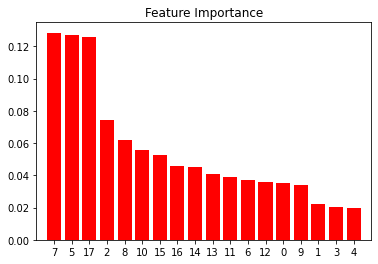

In [161]:
from scrubbing import bestinputs
bestinputs(X,y) #must figure out way to include name of dataframe for each feature